In [1]:
# Install required libraries (if not already available)
!pip install tensorflow matplotlib

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


In [5]:
from google.colab import drive
drive.mount('/content/drive')

# Define dataset path
data_dir = '/content/drive/MyDrive/Fire-Detection'
categories = ['1', '0']

IMG_SIZE = 150
data = []

for category in categories:
    path = os.path.join(data_dir, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append([resized_array, class_num])
        except Exception as e:
            pass

print("Data loaded successfully")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data loaded successfully


In [6]:
import random
random.shuffle(data)

X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

X = np.array(X) / 255.0  # Normalize
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [7]:
datagen = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)


In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=10,
                    validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7239 - loss: 1.7093 - val_accuracy: 0.3871 - val_loss: 0.7852
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4508 - loss: 0.7621 - val_accuracy: 0.6452 - val_loss: 0.6971
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6850 - loss: 0.6956 - val_accuracy: 0.6452 - val_loss: 0.6931
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7431 - loss: 0.6391 - val_accuracy: 0.6452 - val_loss: 0.6490
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.7817 - loss: 0.5664 - val_accuracy: 0.6774 - val_loss: 0.6128
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7560 - loss: 0.5280 - val_accuracy: 0.7419 - val_loss: 0.5473
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.7949 - loss: 0.4975 - val_accuracy: 0.7419 - val_loss: 0.5000
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7980 - loss: 0.4464 - val_accuracy: 0.7419 - val_loss: 0.4484
Epoch 9/10
4/4 ━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.8710 - loss: 0.3678
Test Accuracy: 87.10%


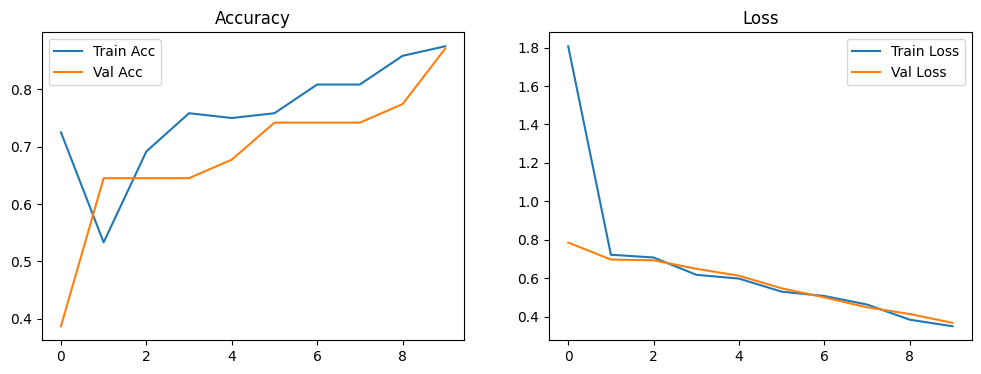

In [10]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# Plot accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


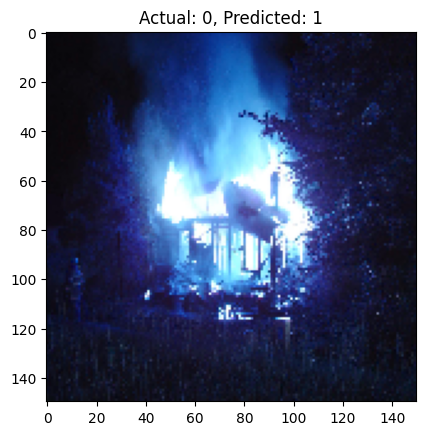

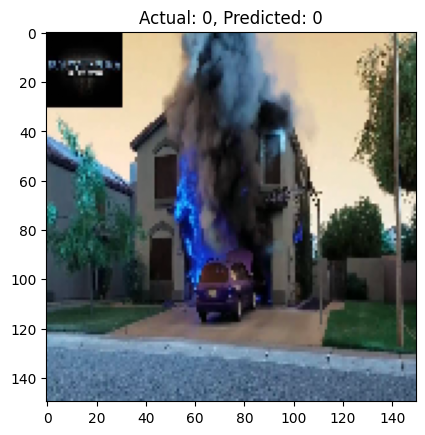

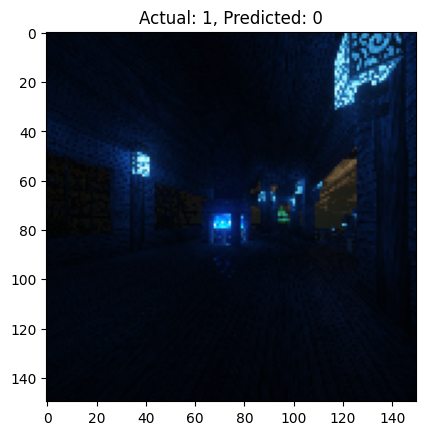

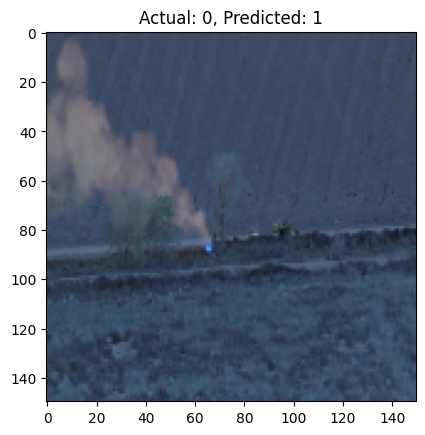

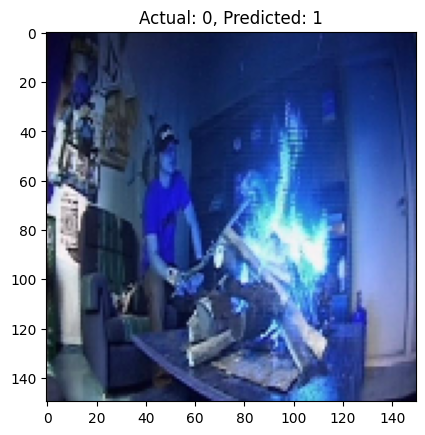

In [19]:
predictions = model.predict(X_test)
predicted_classes = [1 if p < 0.5 else 0 for p in predictions]

# Display a few predictions
for i in range(5):
    plt.imshow(X_test[i])
    plt.title(f"Actual: {y_test[i]}, Predicted: {predicted_classes[i]}")
    plt.show()


In [12]:
# Save model
model.save("forest_fire_detector.h5")

# Load model
from tensorflow.keras.models import load_model
loaded_model = load_model("forest_fire_detector.h5")


In [14]:
def predict_new_image(image_path):
    img = cv2.imread(image_path)

    if img is None:
        print(f"Error: Unable to read image from {image_path}. Please check the path or file.")
        return

    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    img = img.reshape(1, IMG_SIZE, IMG_SIZE, 3)

    prediction = model.predict(img)[0][0]
    label = "🔥 Fire Detected" if prediction > 0.5 else "✅ No Fire Detected"
    print(f"Prediction: {label} (Confidence: {prediction:.2f})")


In [17]:
from google.colab import files
import cv2
import numpy as np

def predict_new_image(image_path):
    img = cv2.imread(image_path)

    if img is None:
        print(f"❌ Error: Unable to read image from {image_path}. Please check the file.")
        return

    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    img = img.reshape(1, IMG_SIZE, IMG_SIZE, 3)

    prediction = model.predict(img)[0][0]
    label = "🔥 Fire Detected" if prediction < 0.5 else "✅ No Fire Detected"
    print(f"Prediction: {label} (Confidence: {prediction:.2f})")

# Upload image from system
uploaded = files.upload()

# Predict for each uploaded file
for file_name in uploaded.keys():
    print(f"\n🖼️ Uploaded file: {file_name}")
    predict_new_image(file_name)


Saving sample image.jpeg to sample image (1).jpeg

🖼️ Uploaded file: sample image (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Prediction: ✅ No Fire Detected (Confidence: 0.92)


In [18]:
from google.colab import files
import cv2
import numpy as np

def predict_new_image(image_path):
    img = cv2.imread(image_path)

    if img is None:
        print(f"❌ Error: Unable to read image from {image_path}. Please check the file.")
        return

    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    img = img.reshape(1, IMG_SIZE, IMG_SIZE, 3)

    prediction = model.predict(img)[0][0]
    label = "🔥 Fire Detected" if prediction < 0.5 else "✅ No Fire Detected"
    print(f"Prediction: {label} (Confidence: {prediction:.2f})")

# Upload image from system
uploaded = files.upload()

# Predict for each uploaded file
for file_name in uploaded.keys():
    print(f"\n🖼️ Uploaded file: {file_name}")
    predict_new_image(file_name)


Saving sample.jpg to sample (1).jpg

🖼️ Uploaded file: sample (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction: 🔥 Fire Detected (Confidence: 0.19)
